Initiating an Embedding layer:
Embedding layer takes two values no of possible tokens and dimensionality of embeddings

In [1]:
from keras.layers import Embedding

Using TensorFlow backend.


In [2]:
embedding_layer=Embedding(1000,64)

Loading the IMDB data for use with an embedding layer

In [3]:
from keras.datasets import imdb
from keras import preprocessing
max_features=10000
maxlen=20

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

17465344/17464789 [==============================] - 1s 0us/step


Using and embedding layer and classifier on the IMDB data

In [4]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

model=Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.summary()
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 10s 513us/step - loss: 0.6734 - acc: 0.6199 - val_loss: 0.6292 - val_acc: 0.6978
Epoch 2/10
20000/20000 [==============================] - 2s 96us/step - loss: 0.5528 

In [0]:
!wget http://mng.bz/0tIo

--2020-03-20 10:59:42--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2020-03-20 10:59:43--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
ERROR: cannot verify mng.bz's certificate, issued by ‘CN=Go Daddy Secure Certificate Authority - G2,OU=http://certs.godaddy.com/repository/,O=GoDaddy.com\\, Inc.,L=Scottsdale,ST=Arizona,C=US’:
  Unable to locally verify the issuer's authority.
To connect to mng.bz insecurely, use `--no-check-certificate'.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!ls

drive  sample_data


In [0]:
!cp '/content/drive/My Drive/aclImdb.zip' 'aclImdb.zip'

In [7]:
!unzip aclImdb.zip

Streaming output truncated to the last 5000 lines.
  inflating: aclImdb/train/pos/7755_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: aclImdb/train/pos/7756_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: aclImdb/train/pos/7757_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: aclImdb/train/pos/7758_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: aclImdb/train/pos/7759_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: aclImdb/train/pos/775_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: aclImdb/train/pos/7760_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: aclImdb/train/pos/7761_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7761_10.txt  
  inflating: aclImdb/train/pos/7762_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7762_8.txt  
  inflating: aclImdb/train/pos/7763_8.txt  
  inflat

In [0]:
!ls 'aclImdb/'

test  train


Processing the labels of the raw IMDB data

In [0]:
import os
imdb_dir = 'aclImdb/'
train_dir=os.path.join(imdb_dir,'train')
labels=[]
texts=[]
for label_type in ['neg','pos']:
  dir_name = os.path.join(train_dir,label_type)
  for fname in os.listdir(dir_name):
    if fname in os.listdir(dir_name):
      f=open(os.path.join(dir_name,fname))
      texts.append(f.read())
      f.close()
      if label_type=='neg':
        labels.append(0)
      else:
        labels.append(1)

Tokenizing the text of raw IMDB data

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen=100
training_samples=8000
validation_samples=10000
max_words=10000

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)
word_index=tokenizer.word_index
print('FOund %s unique tokens.'%len(word_index))

data=pad_sequences(sequences,maxlen=maxlen)
labels=np.asarray(labels)
print('Shape of data tensor',data.shape)
print('Shape of label tensor:',labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]

x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples: training_samples+validation_samples]
y_val=labels[training_samples: training_samples+validation_samples]



FOund 88582 unique tokens.
Shape of data tensor (25000, 100)
Shape of label tensor: (25000,)


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-03-20 19:20:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-20 19:20:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-20 19:20:09--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
!cp '/content/drive/My Drive/'

aclImdb  aclImdb.zip  drive  __MACOSX  sample_data


In [11]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [12]:
!ls 

aclImdb      glove.6B.100d.txt	glove.6B.50d.txt  sample_data
aclImdb.zip  glove.6B.200d.txt	glove.6B.zip
drive	     glove.6B.300d.txt	__MACOSX


Parsing the Glove word embeddings file

In [13]:
glove_dir='glove.6B/'

embeddings_index={}
f=open('glove.6B.100d.txt')
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:],dtype='float32')
  embeddings_index[word]=coefs
f.close()
print('FOund %s word vectors.'%len(embeddings_index))


FOund 400000 word vectors.


Preparing the glove word embeddings matrix

In [0]:
embedding_dim=100
embedding_matrix=np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
  if i<max_words:
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i]=embedding_vector


Model definition

In [15]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

model=Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.layers[0].set_weights((embedding_matrix))
model.layers[0].trainable=False

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


Training and evaluation

In [17]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 213us/step - loss: 0.5308 - acc: 0.7189 - val_loss: 0.3893 - val_acc: 0.8256
Epoch 2/10
8000/8000 [==============================] - 1s 187us/step - loss: 0.1337 - acc: 0.9569 - val_loss: 0.4713 - val_acc: 0.8006
Epoch 3/10
8000/8000 [==============================] - 2s 188us/step - loss: 0.0101 - acc: 0.9979 - val_loss: 0.5768 - val_acc: 0.8157
Epoch 4/10
8000/8000 [==============================] - 1s 182us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.7226 - val_acc: 0.8132
Epoch 5/10
8000/8000 [==============================] - 2s 188us/step - loss: 3.8209e-04 - acc: 0.9999 - val_loss: 0.8476 - val_acc: 0.8156
Epoch 6/10
8000/8000 [==============================] - 2s 190us/step - loss: 6.2946e-06 - acc: 1.0000 - val_loss: 0.9085 - val_acc: 0.8145
Epoch 7/10
8000/8000 [==============================] - 2s 188us/step - loss: 1.7292e-07 - acc: 1.0000 - val_loss: 0.9550 - val

Plotting the resultss

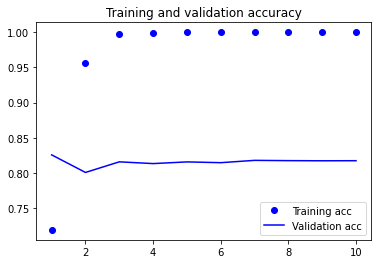

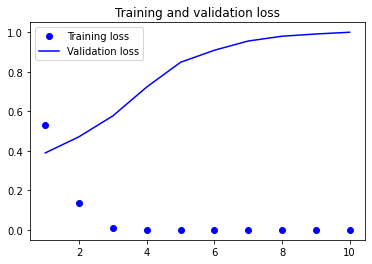

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Training the same model without pretrained word embeddings

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 221us/step - loss: 0.5386 - acc: 0.7134 - val_loss: 0.3846 - val_acc: 0.8278
Epoch 2/10
8000/8000 [==============================] - 2

Tokenizing the data of the test set

In [0]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

Evaluating model on the test set

In [21]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 43us/step


[0.9687116913938523, 0.81568]

In [0]:
#------------------------------------------------------------